## COVID-19'UN DİJİTAL ÖĞRENMEYE ETKİSİ

In [546]:
import pandas as pd
df = pd.read_csv('education_search_world.csv')

In [547]:
# İsimlendirilmemiş sütun veri setindeki satır numarasını belirtir.
# date sütunu verinin ait olduğu tarih bilgisini içerir.
# hits sütunu belirli bir anahtar kelimenin o tarihteki arama hacmini belirtir.
# keyword sütunu analiz edilen anahtar kelimeyi ifade eder.
# geo sütunu verinin ait olduğu coğrafi bölgeyi belirtir (bu projede sadece "world" yani dünya geneli olan datalar kullanılmıştır).
# time sütunu verinin kapsadığı zaman aralığını belirtir.
# gprop sütunu, verinin geldiği Google hizmetini belirtir.
# (bu projede "web", "news", "youtube" içerisinden sadece web aramaları incelenmiştir, datada diğer gprop değerleri bulunmamaktadır)
# category sütunu, anahtar kelimenin ait olduğu kategori kodunu gösterir.

In [548]:
print(df.head())

   Unnamed: 0        date hits          keyword    geo                   time  \
0           1  2017-12-01   29  Online Learning  world  2017-12-01 2024-04-30   
1           2  2018-01-01   33  Online Learning  world  2017-12-01 2024-04-30   
2           3  2018-02-01   34  Online Learning  world  2017-12-01 2024-04-30   
3           4  2018-03-01   34  Online Learning  world  2017-12-01 2024-04-30   
4           5  2018-04-01   31  Online Learning  world  2017-12-01 2024-04-30   

  gprop  category  
0   web         0  
1   web         0  
2   web         0  
3   web         0  
4   web         0  


In [549]:
print(df.tail())

     Unnamed: 0        date hits            keyword    geo  \
380         381  2023-12-01   <1  online proctoring  world   
381         382  2024-01-01   <1  online proctoring  world   
382         383  2024-02-01   <1  online proctoring  world   
383         384  2024-03-01   <1  online proctoring  world   
384         385  2024-04-01   <1  online proctoring  world   

                      time gprop  category  
380  2017-12-01 2024-04-30   web         0  
381  2017-12-01 2024-04-30   web         0  
382  2017-12-01 2024-04-30   web         0  
383  2017-12-01 2024-04-30   web         0  
384  2017-12-01 2024-04-30   web         0  


### Eksik Değer Kontrolü

In [550]:
# Veri setimizde NaN değer bulunmamaktadır.
# 2 sütun Unnamed ve category tam sayı türünde veri içermektedir.
# Diğer 6 sütun ise object türünde veri içermektedir. Hem string hem integer içerebilen sütunlardır.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  385 non-null    int64 
 1   date        385 non-null    object
 2   hits        385 non-null    object
 3   keyword     385 non-null    object
 4   geo         385 non-null    object
 5   time        385 non-null    object
 6   gprop       385 non-null    object
 7   category    385 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 24.2+ KB


In [551]:
# Hiç null değer bulunmamaktadır.
df.isnull().values.any()

np.False_

In [552]:
df.dtypes

Unnamed: 0     int64
date          object
hits          object
keyword       object
geo           object
time          object
gprop         object
category       int64
dtype: object

### Veri Türü Değiştirme İşlemleri

In [553]:
# pd.Categorical yöntemi ile parametre olarak verilen sütundaki veriler category veri tipine dönüştürülerek 
# tekrar eden metin verilerini daha verimli depolamak ve işlemleri hızlandırmak amaçlanmaktadır. 
# Projemizde pratik çok bir faydası yoktur çünkü gprop değeri hep "world" değerine eşittir.
df["gprop"] = pd.Categorical(df.gprop)

print(df["gprop"].dtype)

category


In [554]:
df.head()

,Unnamed: 0,date,hits,keyword,geo,time,gprop,category
0,1,2017-12-01,29,Online Learning,world,2017-12-01 2024-04-30,web,0
1,2,2018-01-01,33,Online Learning,world,2017-12-01 2024-04-30,web,0
2,3,2018-02-01,34,Online Learning,world,2017-12-01 2024-04-30,web,0
3,4,2018-03-01,34,Online Learning,world,2017-12-01 2024-04-30,web,0
4,5,2018-04-01,31,Online Learning,world,2017-12-01 2024-04-30,web,0


### Integer Türündeki Değerler İçin Hesaplamalar

In [555]:
df.shape
# Sadece integer olan değişkenler için bu değerleri hesaplayabildik
df.describe()

,Unnamed: 0,category
count,385.000000,385.0
mean,193.000000,0.0
std,111.284171,0.0
min,1.000000,0.0
25%,97.000000,0.0
50%,193.000000,0.0
75%,289.000000,0.0
max,385.000000,0.0


### Hesaplanan Değerleri CSV Olarak Dışa Aktarma

In [556]:
# Hesaplanan değerleri dış csv dosyasına aktarılarak araştırma kolaylığı sağlanır.
df.describe().to_csv("describe_output.csv", encoding="utf-8")

### Object Türündeki Sütunlar İçin Hesaplamalar

In [557]:
# object türünde veri içeren sütunlar için değerler describe metoduyla düzgün hesaplanamadı.
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,385.0,NaN,NaN,NaN,193.0,111.284171,1.0,97.0,193.0,289.0,385.0
date,385,77,2017-12-01,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hits,385,59,<1,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keyword,385,5,Online Learning,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo,385,1,world,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,385,1,2017-12-01 2024-04-30,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gprop,385,1,web,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,385.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [558]:
kat_df = df.select_dtypes(include = ["object"])

In [559]:
kat_df.keyword.unique()

array(['Online Learning', 'Online teaching', 'Distance learning',
       'Distance education', 'online proctoring'], dtype=object)

<Axes: ylabel='keyword'>

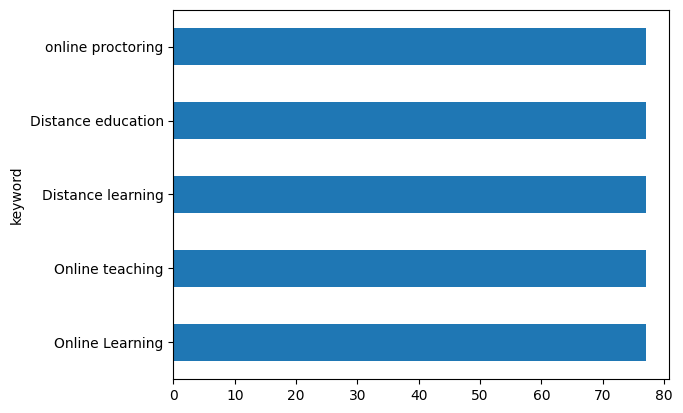

In [560]:
# Veri seti düzenlenmiş olduğu için eşit sayıda kelime incelenmiştir.
df["keyword"].value_counts().plot.barh()

### Online Learning Kelimesinin Zamana Göre Aratılma Sıklığı

In [561]:
from dtaidistance import dtw
import numpy as np

# hits sütunu sayı olarak işlenir
df["hits"] = pd.to_numeric(df["hits"], errors="coerce")

# date sütunu datetime formatına çevrilir
df["date"] = pd.to_datetime(df["date"])

In [562]:
# keyword sütunundan sadece "online learning" kelimesi filtrelenir
learning_df = df[df["keyword"] == "Online Learning"]
teaching_df = df[df["keyword"] == "Online teaching"]

In [ ]:
# COVID-19 başlangıcı için tarih seçildi.
covid_start = pd.to_datetime("2020-03-01")

# Öncesi ve sonrası veriler ayrılır
learning_pre_covid = learning_df[learning_df["date"] < covid_start]["hits"].values
learning_post_covid = learning_df[learning_df["date"] >= covid_start]["hits"].values

teaching_pre_covid = teaching_df[teaching_df["date"] < covid_start]["hits"].values
teaching_post_covid = teaching_df[teaching_df["date"] >= covid_start]["hits"].values

In [564]:
# DTW mesafesini hesaplanır
distance_learning = dtw.distance(learning_pre_covid, learning_post_covid)
distance_teaching = dtw.distance(teaching_pre_covid, teaching_post_covid)

print(f"DTW Distance (Online Learning - Pre vs Post COVID): {distance_learning}")
print(f"DTW Distance (Online Teaching - Pre vs Post COVID): {distance_teaching}")

DTW Distance (Online Learning - Pre vs Post COVID): 173.40126873814967
DTW Distance (Online Teaching - Pre vs Post COVID): 70.57619995437555


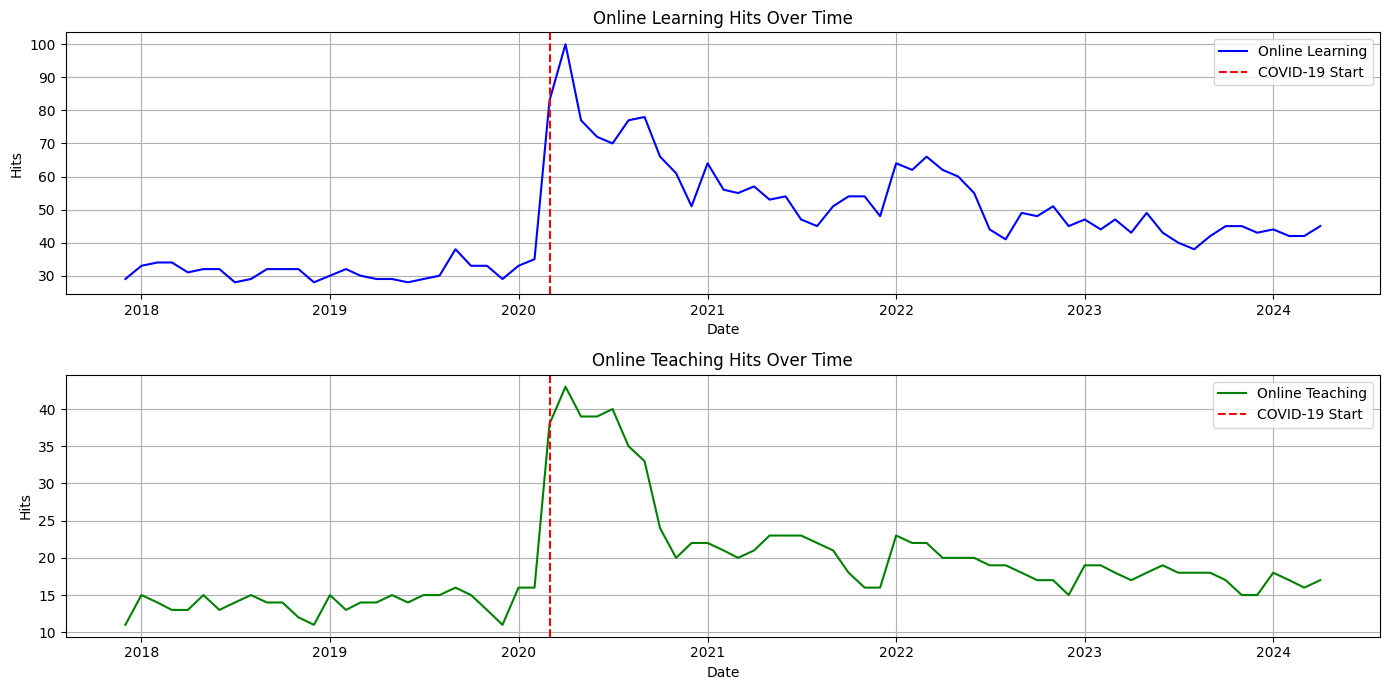

In [565]:
# Grafik çizimi
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Online Learning
plt.subplot(2, 1, 1)
plt.plot(learning_df["date"], learning_df["hits"], label="Online Learning", color="blue")
plt.axvline(x=covid_start, color="red", linestyle="--", label="COVID-19 Start")
plt.title("Online Learning Hits Over Time")
plt.xlabel("Date")
plt.ylabel("Hits")
plt.legend()
plt.grid(True)

# Online Teaching
plt.subplot(2, 1, 2)
plt.plot(teaching_df["date"], teaching_df["hits"], label="Online Teaching", color="green")
plt.axvline(x=covid_start, color="red", linestyle="--", label="COVID-19 Start")
plt.title("Online Teaching Hits Over Time")
plt.xlabel("Date")
plt.ylabel("Hits")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

COVID-19 salgını sırasında hem online learning hem de online teaching kavramlarına olan ilgi arttığı için bu iki değişken arasında güçlü bir doğrusal ilişki gözlenmiştir. Bu durum kovaryans değerinin yüksek çıkmasına neden olmuştur.

In [566]:
# Korelasyon ve kovaryans
merged_df = pd.merge(
    learning_df[["date", "hits"]].rename(columns={"hits": "learning_hits"}),
    teaching_df[["date", "hits"]].rename(columns={"hits": "teaching_hits"}),
    on="date"
)

correlation = merged_df[["learning_hits", "teaching_hits"]].corr()
covariance = merged_df[["learning_hits", "teaching_hits"]].cov()

print("Covariance:")
print(covariance)
print("\nCorrelation:")
print(correlation)

Covariance:
               learning_hits  teaching_hits
learning_hits     234.569378      94.436603
teaching_hits      94.436603      47.880041

Correlation:
               learning_hits  teaching_hits
learning_hits       1.000000       0.891102
teaching_hits       0.891102       1.000000


İki değişken arasındaki kovaryans pozitif ve büyüktür (94.44), bu da pandemi döneminde her iki kavrama olan ilginin birlikte arttığını göstermektedir. Bu ilişkiyi daha yorumlanabilir hale getirmek için korelasyon katsayısı da hesaplanmış ve 0.8911 değeri elde edilmiştir.

## Keywordler İçin Aranma Sıklığı Dağılımı

In [567]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('education_search_world.csv')

# Uygun tarih formatına çevrilir.
df['date'] = pd.to_datetime(df['date'])

# Gerekli sütunlara alınır.
df = df[['date', 'hits', 'keyword']]

# Keyword'e göre gruplanır.
keywords = df['keyword'].unique()

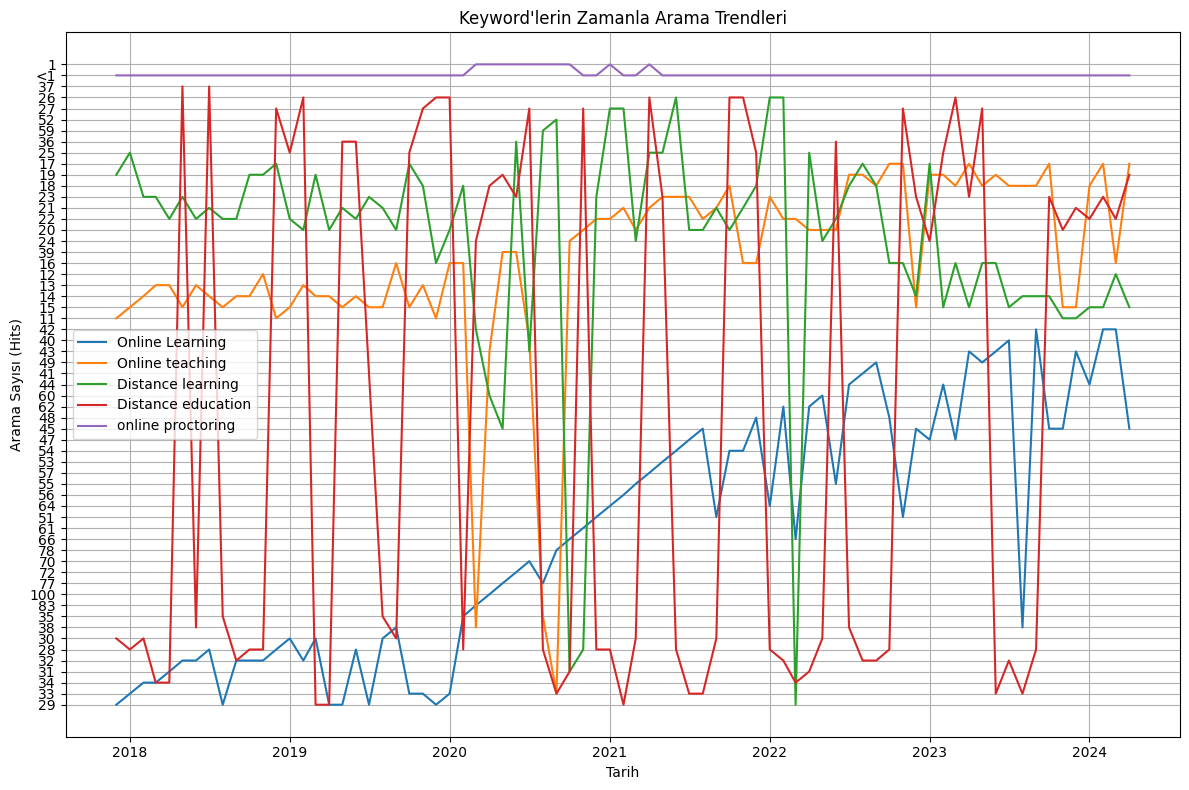

In [568]:
plt.figure(figsize=(12, 8))

for keyword in keywords:
    subset = df[df['keyword'] == keyword]
    subset = subset.sort_values('date')  # Tarihe göre sırala
    plt.plot(subset['date'], subset['hits'], label=keyword)

plt.title('Keyword\'lerin Zamanla Arama Trendleri')
plt.xlabel('Tarih')
plt.ylabel('Arama Sayısı (Hits)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Covid 19 Search ile Education Search Karşılaştırması

In [569]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from prophet import Prophet
from scipy.signal import correlate

# Veriler Yüklenir
df_covid = pd.read_csv("covid_search_world.csv")
df_education = pd.read_csv("education_search_world.csv")

In [570]:
# Tarih formatını düzeltilir
df_covid["date"] = pd.to_datetime(df_covid["date"])
df_education["date"] = pd.to_datetime(df_education["date"])

# '<1' gibi verileri temizlenir
def clean_hits(x):
    if isinstance(x, str):
        if '<' in x:
            return 0.5  # '<1' gibi değerleri 0.5 kabul ediyoruz
        else:
            return float(x)  # normal stringleri sayıya çevir
    return x

df_covid["hits"] = df_covid["hits"].apply(clean_hits)
df_education["hits"] = df_education["hits"].apply(clean_hits)

In [571]:
# Verileri birleştir (date üzerinden)
df_merged = pd.merge(df_covid, df_education, on="date", suffixes=("_covid", "_education"))

In [572]:
# Pearson Korelasyon
correlation = df_merged["hits_covid"].corr(df_merged["hits_education"])
print(f"Pearson Korelasyon Katsayısı (Covid vs. Eğitim Aramaları): {correlation:.4f}")

Pearson Korelasyon Katsayısı (Covid vs. Eğitim Aramaları): 0.1505


In [573]:
# T Testi: Pandemi Öncesi ve Sonrası Eğitim Arama Hacmi
pre_covid = df_merged[df_merged["date"] < "2020-03-01"]["hits_education"]
post_covid = df_merged[df_merged["date"] >= "2020-03-01"]["hits_education"]
t_stat, p_value = ttest_ind(pre_covid, post_covid, equal_var=False)
print(f"\nT Testi Sonuçları:")
print(f"T İstatistiği: {t_stat:.4f}")
print(f"P-değeri: {p_value:.4f}")
if p_value < 0.05:
    print("Pandemi öncesi ve sonrası arasında İSTATİSTİKSEL olarak ANLAMLI bir fark var.")
else:
    print("Pandemi öncesi ve sonrası arasında İSTATİSTİKSEL olarak anlamlı bir fark YOK.")


T Testi Sonuçları:
T İstatistiği: -2.8209
P-değeri: 0.0064
Pandemi öncesi ve sonrası arasında İSTATİSTİKSEL olarak ANLAMLI bir fark var.


In [574]:
from scipy import stats
group1 = df_merged[df_merged["date"] < "2020-03-01"]["hits_education"]
group2 = df_merged[(df_merged["date"] >= "2020-03-01") & (df_merged["date"] < "2021-07-01")]["hits_education"]
group3 = df_merged[df_merged["date"] >= "2021-07-01"]["hits_education"]

# ANOVA testi çalıştırma
f_stat, p_value_anova = stats.f_oneway(group1, group2, group3)

print("ANOVA Testi Sonuçları:")
print(f"F İstatistiği: {f_stat:.4f}")
print(f"P-değeri: {p_value_anova:.4f}")

if p_value_anova < 0.05:
    print("Gruplar arasında İSTATİSTİKSEL olarak ANLAMLI bir fark var.")
else:
    print("Gruplar arasında istatistiksel olarak anlamlı bir fark YOK.")

ANOVA Testi Sonuçları:
F İstatistiği: 5.9111
P-değeri: 0.0037
Gruplar arasında İSTATİSTİKSEL olarak ANLAMLI bir fark var.


C:\Users\asligul\AppData\Local\Temp\ipykernel_14440\3494513933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="hits_education", data=df_merged, palette="coolwarm")


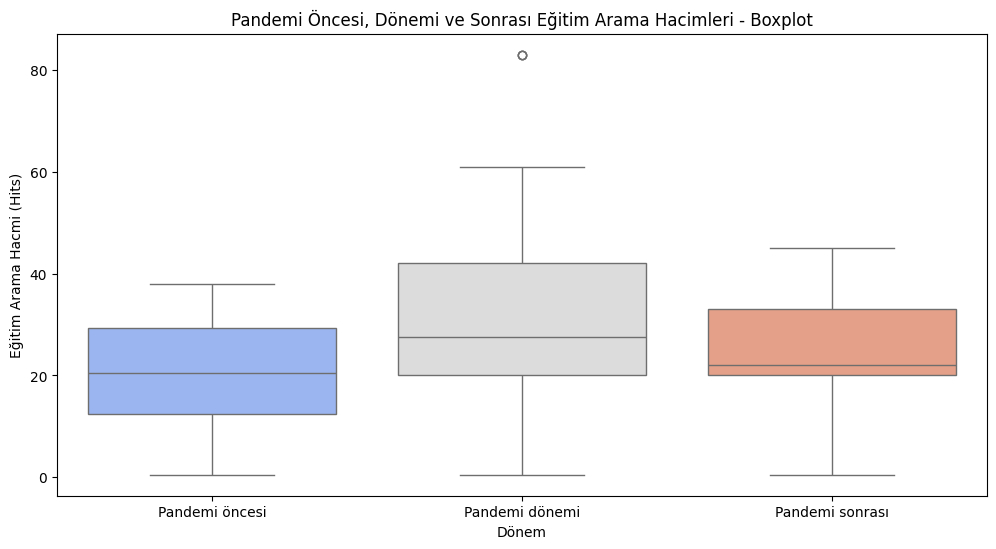

In [576]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri gruplarını oluşturma
df_merged["group"] = "Pandemi öncesi"
df_merged.loc[(df_merged["date"] >= "2020-03-01") & (df_merged["date"] < "2021-07-01"), "group"] = "Pandemi dönemi"
df_merged.loc[df_merged["date"] >= "2021-07-01", "group"] = "Pandemi sonrası"

# Boxplot çizimi
plt.figure(figsize=(12, 6))
sns.boxplot(x="group", y="hits_education", data=df_merged, palette="coolwarm")
plt.xlabel("Dönem")
plt.ylabel("Eğitim Arama Hacmi (Hits)")
plt.title("Pandemi Öncesi, Dönemi ve Sonrası Eğitim Arama Hacimleri - Boxplot")
plt.show()

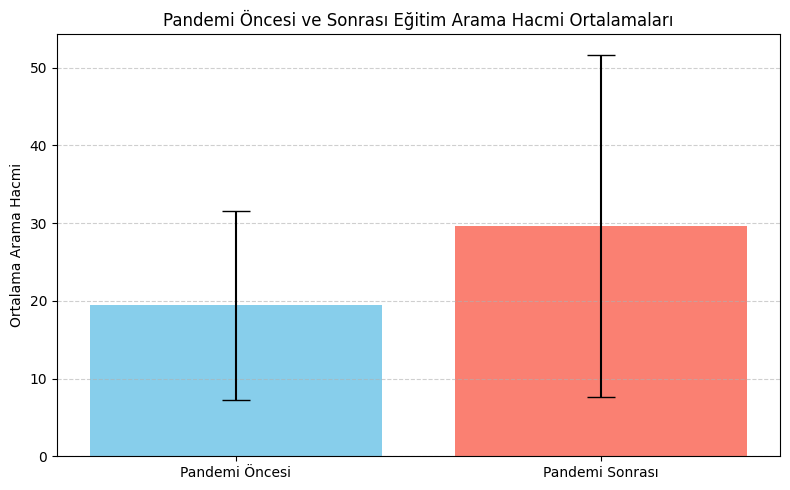

In [577]:
# Grafik: Ortalama karşılaştırması
labels = ['Pandemi Öncesi', 'Pandemi Sonrası']
means = [pre_covid.mean(), post_covid.mean()]
errors = [pre_covid.std(), post_covid.std()]  # Hata çubukları için standart sapmalar

plt.figure(figsize=(8, 5))
plt.bar(labels, means, yerr=errors, capsize=10, color=['skyblue', 'salmon'])
plt.title('Pandemi Öncesi ve Sonrası Eğitim Arama Hacmi Ortalamaları')
plt.ylabel('Ortalama Arama Hacmi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [578]:
# 6. İteratif Çiftler Karşılaştırması
df_comparison = pd.DataFrame({
    "date": df_merged["date"],
    "Covid Hits": df_merged["hits_covid"],
    "Education Hits": df_merged["hits_education"],
    "Difference": abs(df_merged["hits_covid"] - df_merged["hits_education"])
})
print("\nİteratif Çiftler Karşılaştırması (İlk 5 Kayıt):")
print(df_comparison.head())



İteratif Çiftler Karşılaştırması (İlk 5 Kayıt):
        date  Covid Hits  Education Hits  Difference
0 2018-04-01         0.0            31.0        31.0
1 2018-04-01         0.0            13.0        13.0
2 2018-04-01         0.0            22.0        22.0
3 2018-04-01         0.0            34.0        34.0
4 2018-04-01         0.0             0.5         0.5


In [579]:
# 7. Normalize Edilmiş Çapraz Korelasyon Hesaplama
education_series = df_merged["hits_education"] - df_merged["hits_education"].mean()
covid_series = df_merged["hits_covid"] - df_merged["hits_covid"].mean()

# Normalize etmek için standart sapmalara ve uzunluğa böleceğiz
cross_corr = correlate(covid_series, education_series, mode="full")

# Normalizasyon işlemi
norm_factor = np.std(covid_series) * np.std(education_series) * len(covid_series)
cross_corr_normalized = cross_corr / norm_factor

lags = np.arange(-len(df_merged) + 1, len(df_merged))

lag_with_max_correlation = lags[np.argmax(cross_corr_normalized)]
max_correlation = np.max(cross_corr_normalized)

print(f"\nEn yüksek *normalize edilmiş* çapraz korelasyon değeri: {max_correlation:.4f}")
print(f"En iyi gecikme süresi: {lag_with_max_correlation} hafta")


En yüksek *normalize edilmiş* çapraz korelasyon değeri: 0.1505
En iyi gecikme süresi: 0 hafta


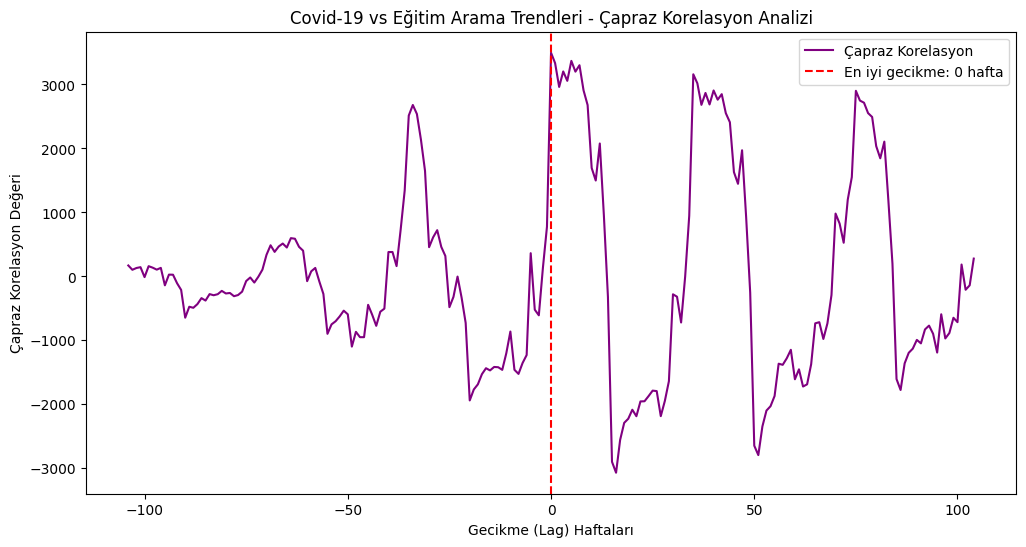

In [580]:
# 8. Çapraz Korelasyonu Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr, label="Çapraz Korelasyon", color="purple")
plt.axvline(lag_with_max_correlation, color='red', linestyle='--', label=f"En iyi gecikme: {lag_with_max_correlation} hafta")
plt.xlabel("Gecikme (Lag) Haftaları")
plt.ylabel("Çapraz Korelasyon Değeri")
plt.title("Covid-19 vs Eğitim Arama Trendleri - Çapraz Korelasyon Analizi")
plt.legend()
plt.show(block=False)


In [581]:
# 9. Zaman Serisi Analizi - Prophet Modeli (Education Aramaları için)
df_prophet = df_merged[["date", "hits_education"]].rename(columns={"date": "ds", "hits_education": "y"})
model = Prophet()
model.fit(df_prophet)

11:05:21 - cmdstanpy - INFO - Chain [1] start processing
11:05:21 - cmdstanpy - INFO - Chain [1] done processing


In [582]:
# 10. Gelecek Tahminleri
future = model.make_future_dataframe(periods=180, freq='W')
forecast = model.predict(future)

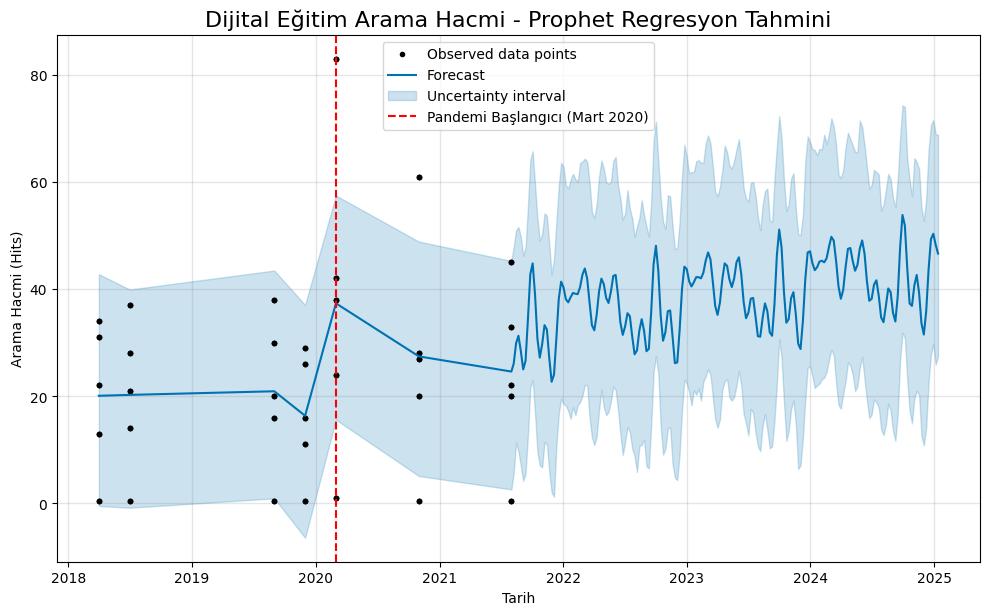

In [583]:
# 11. Tahminleri Görselleştir
model.plot(forecast)
plt.title("Dijital Eğitim Arama Hacmi - Prophet Regresyon Tahmini", fontsize=16)
plt.xlabel("Tarih")
plt.ylabel("Arama Hacmi (Hits)")
plt.axvline(pd.to_datetime("2020-03-01"), color='red', linestyle='--', label="Pandemi Başlangıcı (Mart 2020)")
plt.legend()
plt.show()

# Covid 19'un Okullar Üzerindeki Etkisi

In [584]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri kümesini oku
df = pd.read_csv("covid_impact_education_full.csv")

In [585]:
# 'Date' sütununu tarih formatına çevir
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [586]:
# Ülkelerin eğitim durumlarını sayarak gruplandır
status_counts = df.groupby(['Date', 'Status']).size().reset_index(name='Count')

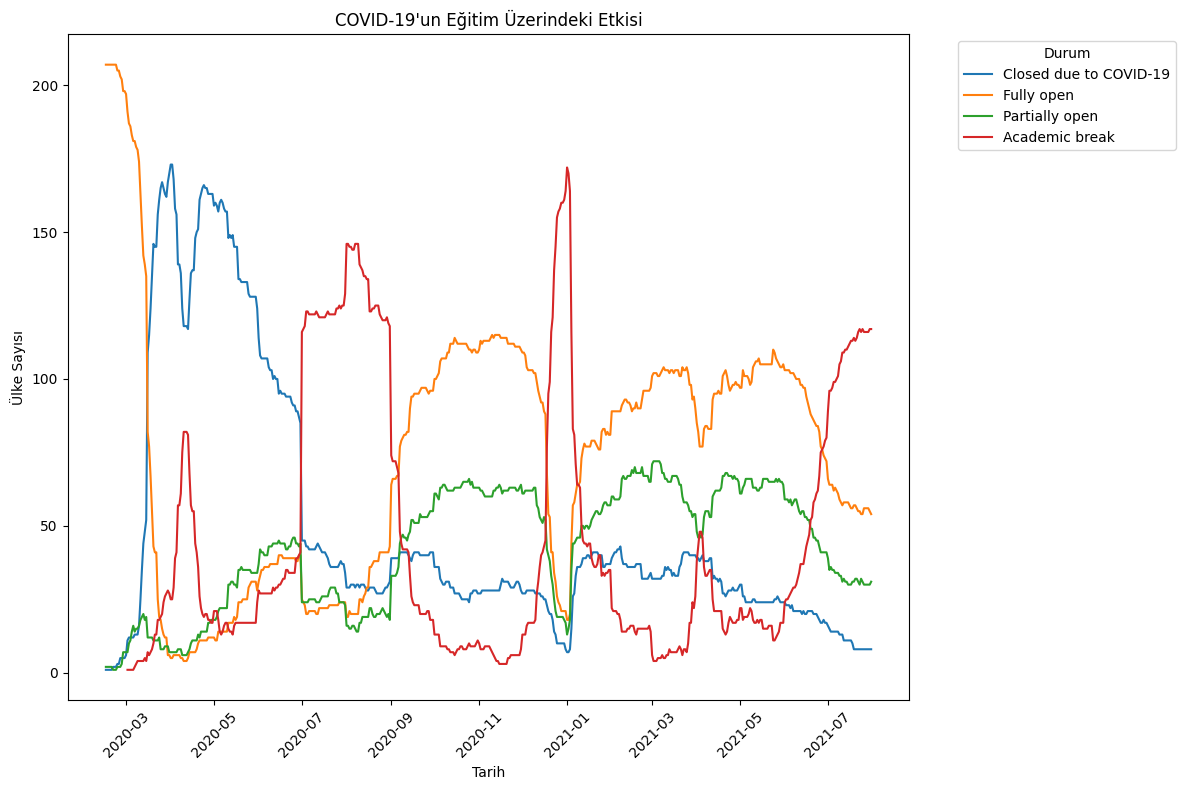

In [587]:
# Grafik oluştur
plt.figure(figsize=(12, 8))
sns.lineplot(data=status_counts, x='Date', y='Count', hue='Status', markers=True)
# Grafiği özelleştir
plt.title("COVID-19'un Eğitim Üzerindeki Etkisi")
plt.xlabel("Tarih")
plt.ylabel("Ülke Sayısı")
plt.xticks(rotation=45)
plt.legend(title='Durum', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Grafiği göster
plt.show()

# Pandemi Sürecinde İletişim Platformların Karşılaştırmalı Kullanım Trendleri

In [588]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükle
df = pd.read_csv("edu_only_Collaboration_platforms_world.csv")

# Tarihi datetime formatına çevir
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Eksik verileri temizle
df.dropna(subset=["hits", "date", "keyword"], inplace=True)

# Kullanım verisini sayıya çevir (eğer 'hits' string olarak gelirse) ve '<1' değerlerini 0'a çevir
df["hits"] = pd.to_numeric(df["hits"], errors="coerce")  # Sayıya çevir
df["hits"] = df["hits"].replace("<1", 0.5)  # '<1' olanları 0 yap

# Eksik verileri kaldırma yerine 0 ile doldur
df["hits"].fillna(0, inplace=True)

# Tarihe göre sırala
df.sort_values("date", inplace=True)

# Pivot tablo oluştur: satırlar = tarih, sütunlar = platform (keyword), değerler = hits
pivot_df = df.pivot_table(index="date", columns="keyword", values="hits", aggfunc="sum")

# Eksik verileri 0 ile doldur (pivot tabloda da)
pivot_df.fillna(0, inplace=True)

print(pivot_df.head())  # İlk birkaç satırı görüntüle

keyword     Dingtalk  Hangouts Meet  Lark  Skype  Teams  WhatsApp  Zoom
date                                                                   
2019-12-01       0.0            0.0   0.0    1.0    3.0      34.0   2.0
2019-12-08       0.0            0.0   0.0    1.0    2.0      35.0   2.0
2019-12-15       0.0            0.0   0.0    1.0    3.0      29.0   2.0
2019-12-22       0.0            0.0   0.0    1.0    1.0      23.0   1.0
2019-12-29       0.0            0.0   0.0    1.0    1.0      23.0   2.0


C:\Users\asligul\AppData\Local\Temp\ipykernel_14440\2283535908.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["hits"].fillna(0, inplace=True)


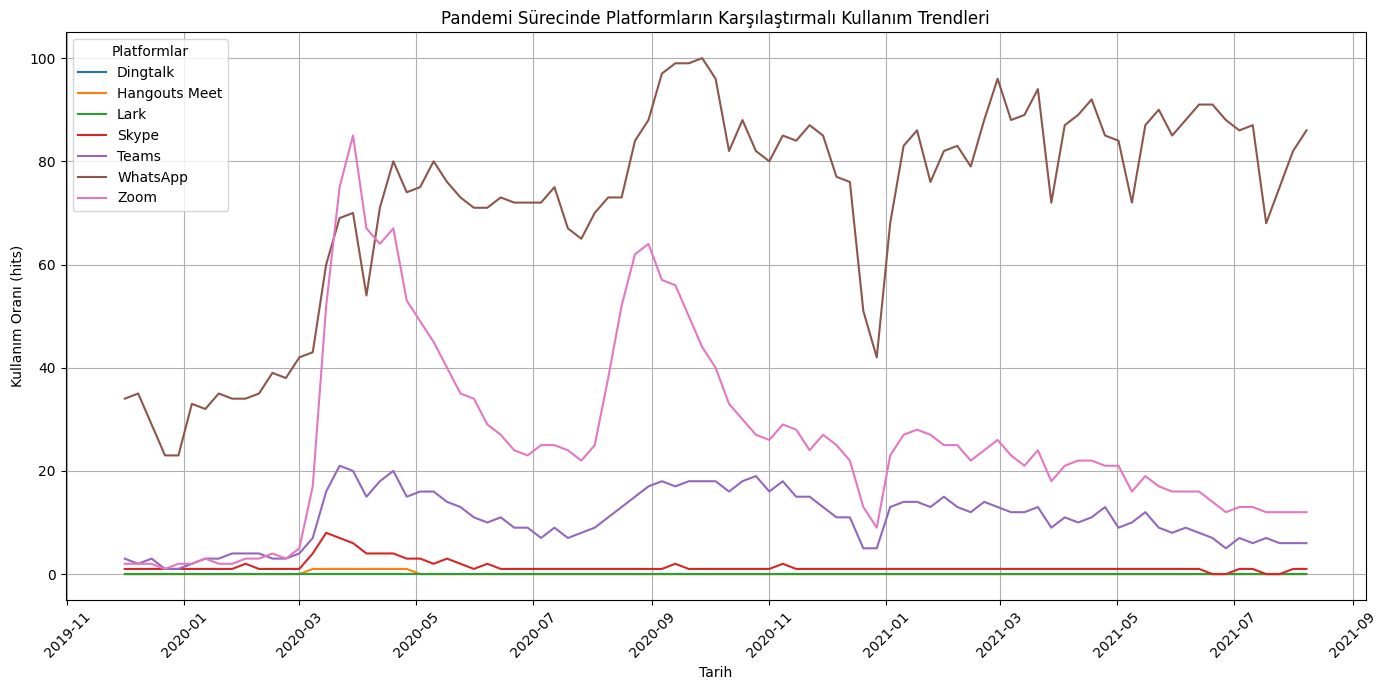

In [589]:
# Grafik çizimi
plt.figure(figsize=(14, 7))
for platform in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[platform], label=platform)

plt.xlabel("Tarih")
plt.ylabel("Kullanım Oranı (hits)")
plt.title("Pandemi Sürecinde Platformların Karşılaştırmalı Kullanım Trendleri")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Platformlar")
plt.tight_layout()
plt.show()

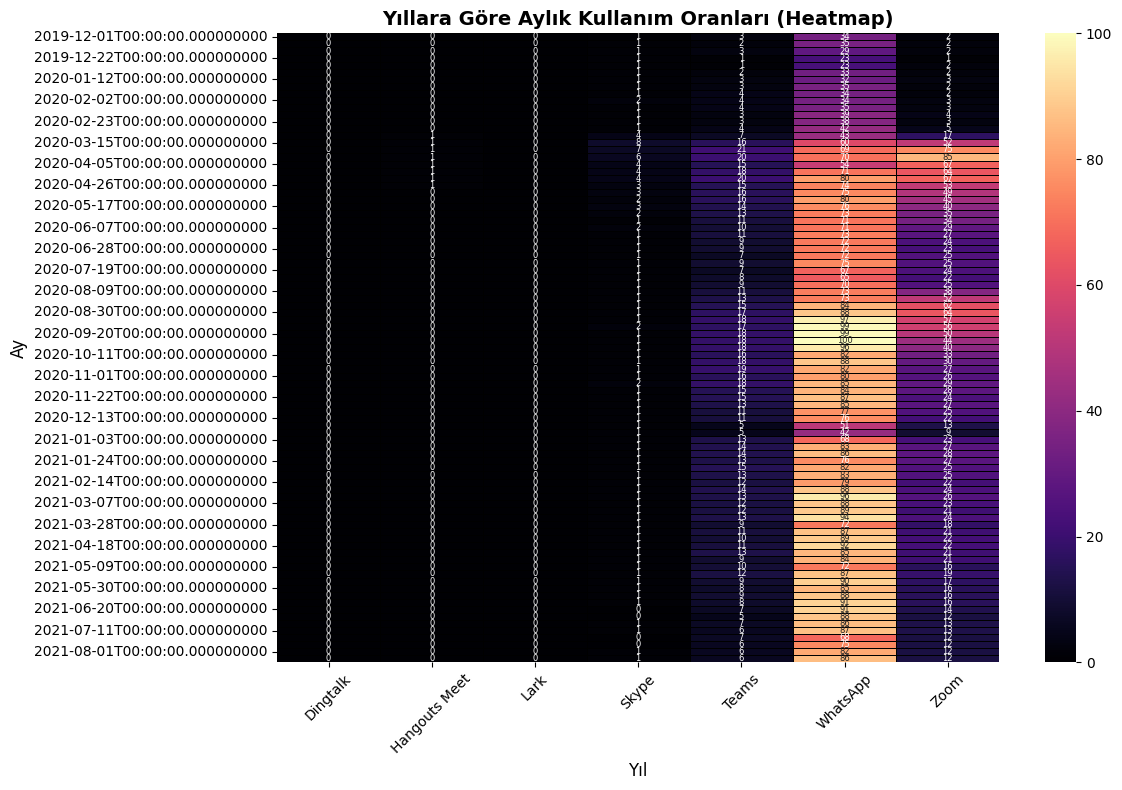

In [590]:
plt.figure(figsize=(12, 8))  # Görsel büyüklüğü
sns.heatmap(
    pivot_df, 
    annot=True,               # Hücre içine sayıları yaz
    fmt=".0f",                # Sayı formatı: integer
    cmap="magma",             # Renk skalası
    linewidths=0.5,           # Hücre kenar çizgileri
    linecolor="black",        # Çizgi rengi
    cbar=True,                # Sağdaki renk skalası
    annot_kws={"size": 6}     # Hücre içi yazı boyutu
)

# Başlık ve eksenler
plt.title("Yıllara Göre Aylık Kullanım Oranları (Heatmap)", fontsize=14, fontweight='bold')
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Ay", fontsize=12)

# X eksenindeki etiketleri döndür
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Neden Daha Fazla Kullanıldılar? (Whatsapp Zoom Teams)
- WhatsApp → Kolay erişim ve yaygın kullanım
- Öğrenciler ve öğretmenler zaten WhatsApp kullanıyordu, bu yüzden hızlıca adapte oldular.
- Küçük gruplar için anlık mesajlaşma ve dosya paylaşımı çok pratikti.
- Zoom → Geniş katılımcı desteği ve kolay erişim
- Üyelik gerektirmeden toplantılara katılma imkanı sundu.
- Büyük sınıflar ve webinarlar için idealdi.
- Ekran paylaşımı ve kayıt alma özellikleri eğitimde çok kullanışlı oldu.
- Microsoft Teams → Kurumsal ve eğitim odaklı yapı
- Okullar ve üniversiteler tarafından tercih edildi çünkü Office 365 entegrasyonu vardı.
- Ödev paylaşımı, grup çalışmaları ve ders takvimi gibi özellikler sundu.
- Güvenlik açısından daha güçlüydü, özellikle büyük kurumlar için.

## Pandemi Sürecinde Online Eğitim Platformların Karşılaştırmalı Kullanım Trendleri

In [591]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
df = pd.read_csv("Digital_lms_world.csv")

# Tarihi datetime formatına çevir
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Eksik verileri temizle
df.dropna(subset=["hits", "date", "keyword"], inplace=True)

# Kullanım verisini sayıya çevir (eğer 'hits' string olarak gelirse) ve '<1' değerlerini 0'a çevir
df["hits"] = pd.to_numeric(df["hits"], errors="coerce")  # Sayıya çevir
df["hits"] = df["hits"].replace("<1", 0.5)  # '<1' olanları 0 yap

# Eksik verileri kaldırma yerine 0 ile doldur
df["hits"].fillna(0, inplace=True)

# Tarihe göre sırala
df.sort_values("date", inplace=True)

# Pivot tablo oluştur: satırlar = tarih, sütunlar = platform (keyword), değerler = hits
pivot_df = df.pivot_table(index="date", columns="keyword", values="hits", aggfunc="sum")

# Eksik verileri 0 ile doldur (pivot tabloda da)
pivot_df.fillna(0, inplace=True)

print(pivot_df.head())  # İlk birkaç satırı görüntüle

keyword     CenturyTech  ClassDojo  Edmodo  Edraak  EkStep  Google Classroom  \
date                                                                           
2019-12-01          0.0        0.0     2.0     0.0     0.0              29.0   
2019-12-08          0.0        0.0     1.0     0.0     0.0              30.0   
2019-12-15          0.0        0.0     1.0     0.0     0.0              21.0   
2019-12-22          0.0        0.0     0.0     0.0     0.0               2.0   
2019-12-29          0.0        0.0     0.0     0.0     0.0               4.0   

keyword     Moodle  Nafham  Paper Airplanes  Schoology  Seesaw  Skooler  
date                                                                     
2019-12-01     9.0     0.0              0.0        2.0     1.0      0.0  
2019-12-08     8.0     0.0              0.0        2.0     1.0      0.0  
2019-12-15     7.0     0.0              0.0        2.0     1.0      0.0  
2019-12-22     3.0     0.0              0.0        0.0     0.0      0

C:\Users\asligul\AppData\Local\Temp\ipykernel_14440\3586829443.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["hits"].fillna(0, inplace=True)


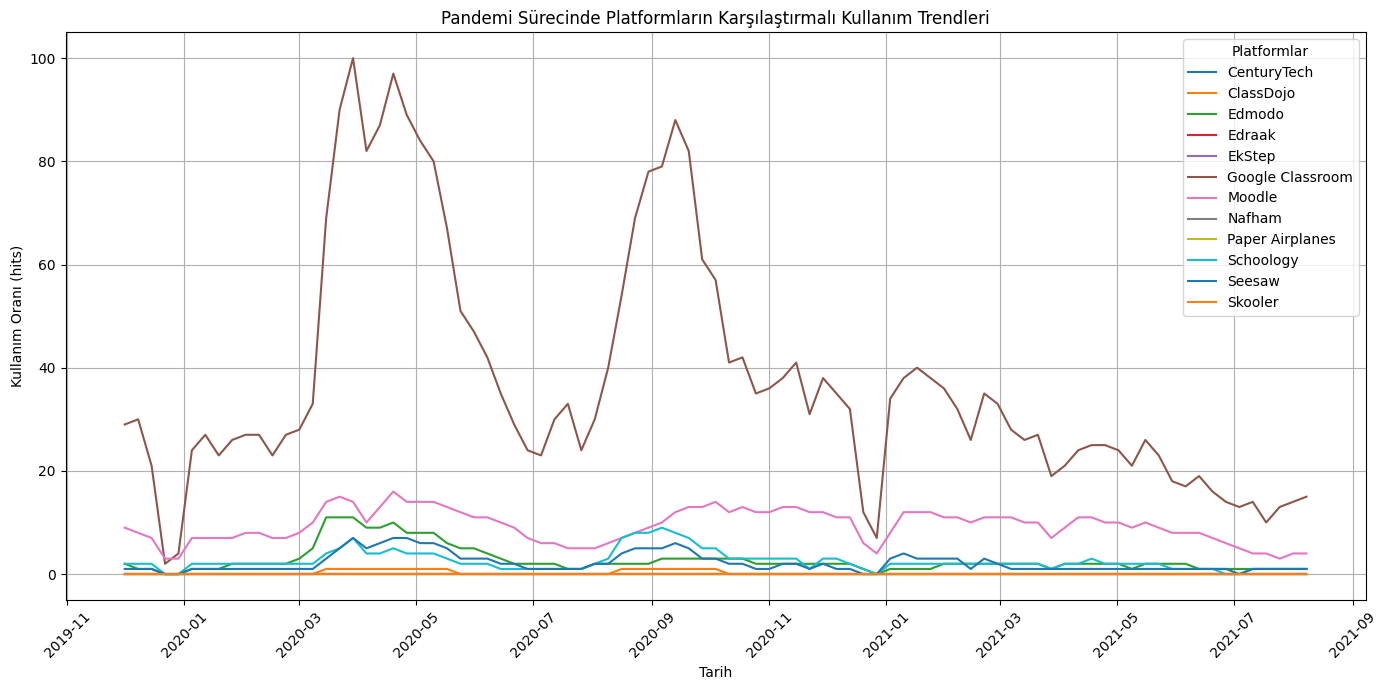

In [592]:
# Grafik çizimi
plt.figure(figsize=(14, 7))
for platform in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[platform], label=platform)

plt.xlabel("Tarih")
plt.ylabel("Kullanım Oranı (hits)")
plt.title("Pandemi Sürecinde Platformların Karşılaştırmalı Kullanım Trendleri")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Platformlar")
plt.tight_layout()
plt.show()

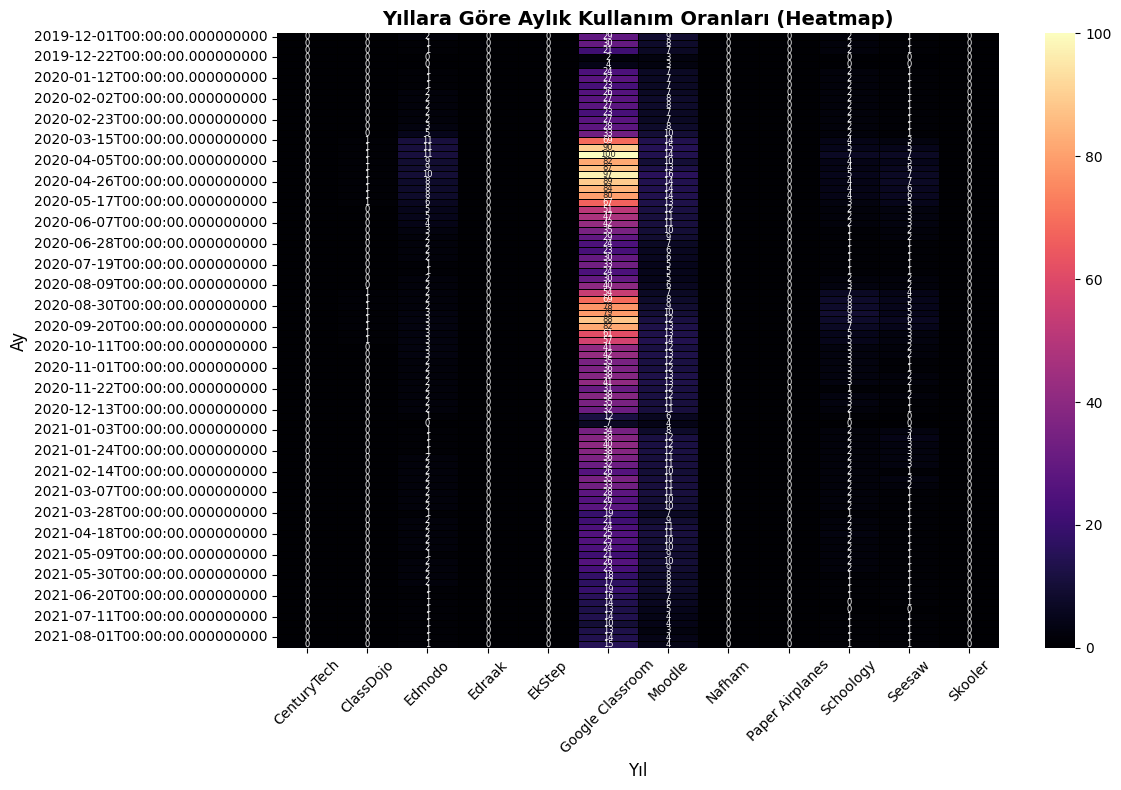

In [593]:
plt.figure(figsize=(12, 8))  # Görsel büyüklüğü
sns.heatmap(
    pivot_df, 
    annot=True,               # Hücre içine sayıları yaz
    fmt=".0f",                # Sayı formatı: integer
    cmap="magma",             # Renk skalası
    linewidths=0.5,           # Hücre kenar çizgileri
    linecolor="black",        # Çizgi rengi
    cbar=True,                # Sağdaki renk skalası
    annot_kws={"size": 6}     # Hücre içi yazı boyutu
)

# Başlık ve eksenler
plt.title("Yıllara Göre Aylık Kullanım Oranları (Heatmap)", fontsize=14, fontweight='bold')
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Ay", fontsize=12)

# X eksenindeki etiketleri döndür
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Google Classroom pandemi döneminde çok tercih edildi çünkü:

 Kolay kullanım – Teknik bilgi gerektirmeden öğretmen ve öğrenciler adapte olabildi.

 Google ekosistemiyle uyum – Drive, Docs, Meet entegrasyonu sayesinde ders yönetimi kolaylaştı.

 Öğrenci takibi ve ödev yönetimi – Öğretmenler ilerlemeyi takip edebildi, öğrenciler ödevlerini doğrudan teslim etti.
 
 Ücretsiz ve erişilebilir – Özellikle okullar için düşük maliyetli, yaygın bir çözümdü.

# Covid Cases and Collaboration Platforms

In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from statsmodels.tsa.seasonal import seasonal_decompose

In [595]:
df = pd.read_csv("covid_cases.csv")

print(df.columns)

Index(['Unnamed: 0', 'date', 'confirmed', 'death', 'recovery'], dtype='object')


In [596]:
# Take a random sample (optional)
df_sample = df.sample(n=800, random_state=42)

# Convert 'date' column to datetime format
df_sample['date'] = pd.to_datetime(df_sample['date'])

# Sort the data by date
df_sample = df_sample.sort_values(by='date')

# Calculate daily new values (first difference)
df_sample['daily_confirmed'] = df_sample['confirmed'].diff().fillna(0)
df_sample['daily_deaths'] = df_sample['death'].diff().fillna(0)
df_sample['daily_recoveries'] = df_sample['recovery'].diff().fillna(0)

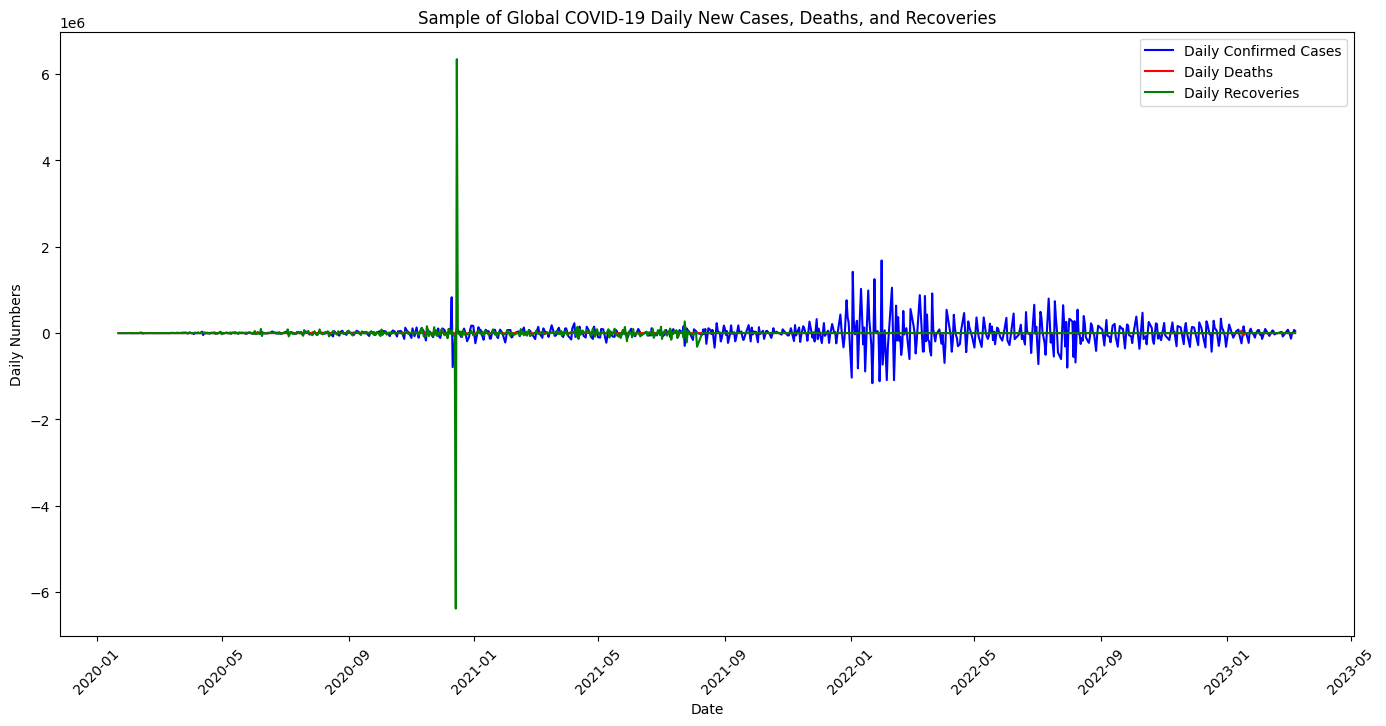

In [597]:
plt.figure(figsize=(14, 7))

plt.plot(df_sample['date'], df_sample['daily_confirmed'], label='Daily Confirmed Cases', color='blue')
plt.plot(df_sample['date'], df_sample['daily_deaths'], label='Daily Deaths', color='red')
plt.plot(df_sample['date'], df_sample['daily_recoveries'], label='Daily Recoveries', color='green')

plt.title("Sample of Global COVID-19 Daily New Cases, Deaths, and Recoveries")
plt.xlabel("Date")
plt.ylabel("Daily Numbers")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [598]:
# Load data
before_df = pd.read_csv("Collaboration_platforms_world.csv")
after_df = pd.read_csv('edu_only_Collaboration_platforms_world.csv')  # Make sure this path is correct or adjust it

combined_df = pd.concat([before_df, after_df])
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Automatically assign period based on the year
combined_df['period'] = combined_df['date'].apply(lambda x: 'Before COVID' if x.year < 2020 else 'After COVID')


In [599]:
combined_df = pd.concat([before_df, after_df])
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Label period based on year
combined_df['period'] = combined_df['date'].apply(lambda x: 'Before COVID' if x.year < 2020 else 'After COVID')

In [600]:
from scipy.stats import ttest_ind

# Choose a keyword
keyword = 'Zoom'  # You can change this

# Filter data
df_keyword = combined_df[combined_df['keyword'] == keyword]
before_hits = df_keyword[df_keyword['period'] == 'Before COVID']['hits']
after_hits = df_keyword[df_keyword['period'] == 'After COVID']['hits']

# Perform t-test
t_stat, p_value = ttest_ind(before_hits, after_hits, equal_var=False)  # Welch’s t-test
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in interest before and after COVID.")
else:
    print("No significant difference in interest before and after COVID.")

T-statistic: -16.66
P-value: 0.0000
There is a statistically significant difference in interest before and after COVID.


In [601]:
#  Step 3: Perform T-Tests for All Keywords

results = []

for keyword in combined_df['keyword'].unique():
    df_keyword = combined_df[combined_df['keyword'] == keyword]
    before_hits = df_keyword[df_keyword['period'] == 'Before COVID']['hits']
    after_hits = df_keyword[df_keyword['period'] == 'After COVID']['hits']
    
    # Welch's t-test (handles unequal variance)
    t_stat, p_value = ttest_ind(before_hits, after_hits, equal_var=False, nan_policy='omit')
    
    results.append({
        'Keyword': keyword,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

# Create and display results table
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='P-value'))


         Keyword  T-statistic       P-value Significant
0           Zoom   -16.656987  5.518277e-38         Yes
5          Teams   -17.820088  1.208004e-22         Yes
4       WhatsApp   -11.598279  8.720901e-08         Yes
3  Hangouts Meet    -4.210377  1.204596e-04         Yes
6          Skype    -2.948280  6.300681e-03         Yes
1       Dingtalk          NaN           NaN          No
2           Lark          NaN           NaN          No


c:\Users\asligul\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


C:\Users\asligul\AppData\Local\Temp\ipykernel_14440\531383393.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=grouped_stats, x='keyword', y='mean', hue='period', ci='sd')


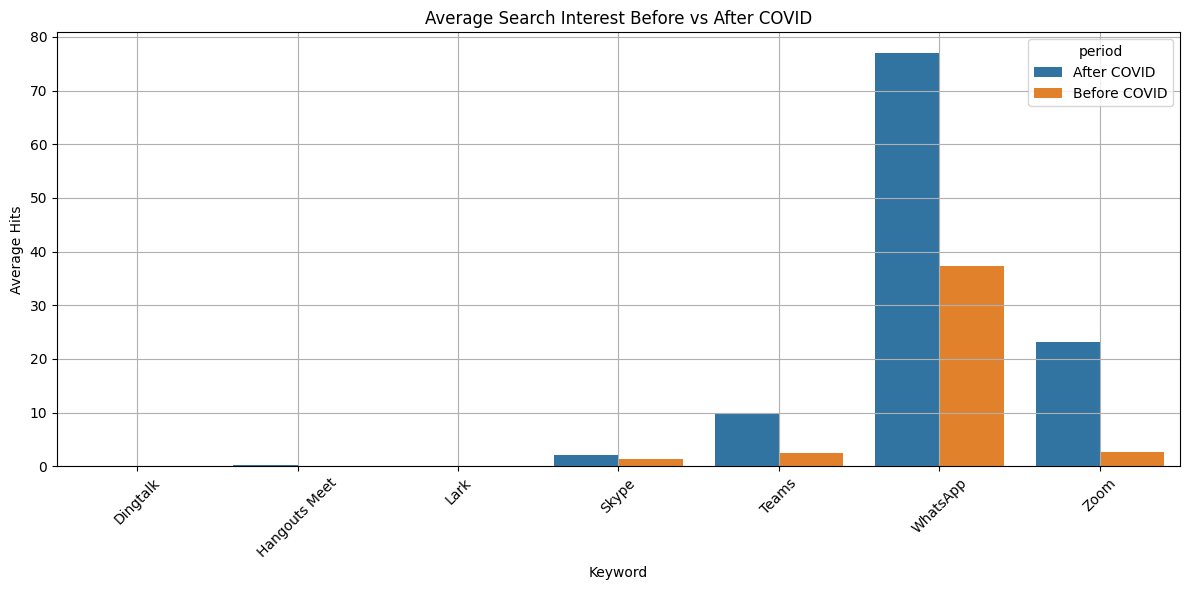

In [602]:
#  Step 4: Bar Plot of Average Hits Before vs After COVID

# Compute stats
grouped_stats = combined_df.groupby(['keyword', 'period'])['hits'].agg(['mean', 'std']).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_stats, x='keyword', y='mean', hue='period', ci='sd')
plt.title('Average Search Interest Before vs After COVID')
plt.ylabel('Average Hits')
plt.xlabel('Keyword')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Usage and Features of Teaching Tools

In [603]:
df_combined = pd.read_csv("Tools_for_teachers_world.csv")

In [604]:
print(df_combined.head())

   Unnamed: 0        date hits  keyword    geo                   time gprop  \
0           1  2019-12-01   21  Nearpod  world  2019-12-01 2021-08-15   web   
1           2  2019-12-08   18  Nearpod  world  2019-12-01 2021-08-15   web   
2           3  2019-12-15   10  Nearpod  world  2019-12-01 2021-08-15   web   
3           4  2019-12-22    1  Nearpod  world  2019-12-01 2021-08-15   web   
4           5  2019-12-29    2  Nearpod  world  2019-12-01 2021-08-15   web   

   category  
0         0  
1         0  
2         0  
3         0  
4         0  


In [605]:
df_combined['hits'] = pd.to_numeric(df_combined['hits'], errors='coerce')

In [606]:
app_popularity = df_combined.groupby('keyword')['hits'].sum().sort_values(ascending=False)

In [607]:
# Display top 10 most popular applications
top_apps = app_popularity.head(10)
print("Top 10 Applications by Total Search Hits:")
print(top_apps)

Top 10 Applications by Total Search Hits:
keyword
Trello       3122.0
Nearpod      2142.0
EdPuzzle      796.0
Pear Deck     257.0
Kaltura        97.0
Thinglink      79.0
Buncee          0.0
EduCaixa        0.0
Squigl          0.0
Name: hits, dtype: float64


C:\Users\asligul\AppData\Local\Temp\ipykernel_14440\3384095491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_apps.values, y=top_apps.index, palette="coolwarm")


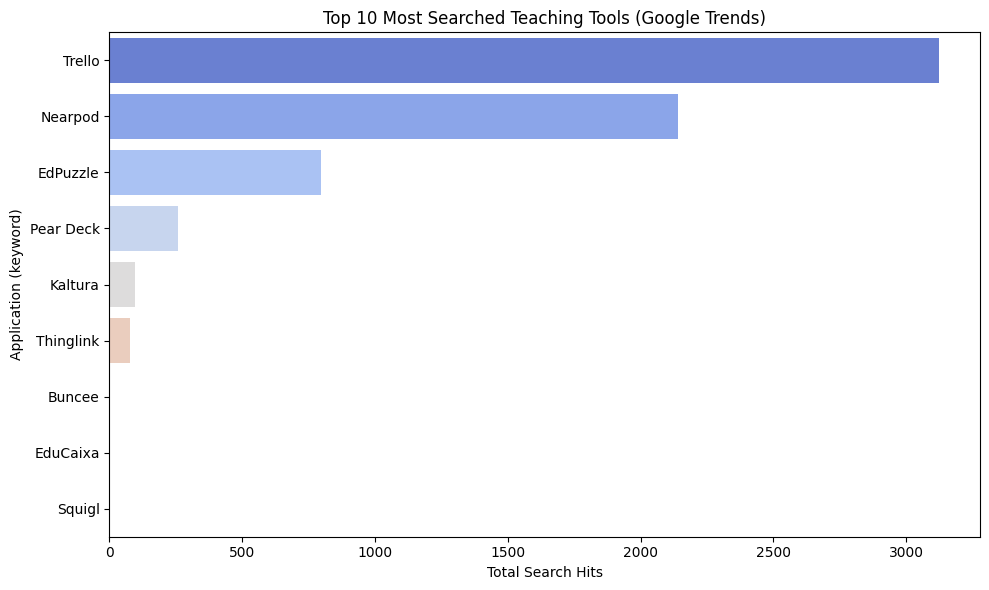

In [608]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_apps.values, y=top_apps.index, palette="coolwarm")
plt.title("Top 10 Most Searched Teaching Tools (Google Trends)")
plt.xlabel("Total Search Hits")
plt.ylabel("Application (keyword)")
plt.tight_layout()
plt.show()

In [609]:
# Application	Video Conferencing	Quizzes	Breakout Rooms	File Sharing	Collaboration	Gamification
# Trello	        No	                No	        No	          Yes	        Yes	        No
# Nearpod	        Yes	                Yes	        Yes	          Yes	        Yes	        Yes
# EdPuzzle	        No	                Yes	        No	          Yes	        Yes	        No
# Pear Deck	        Yes	                Yes	        Yes	          Yes	        Yes	        Yes
# Kaltura	        Yes	                No	        Yes	          Yes	        Yes	        No
# Thinglink	        No	                No	        No	          Yes	        Yes	        No
# Buncee	        Yes	                Yes	        Yes	          Yes	        Yes	        Yes
# EduCaixa	        Yes	                Yes	        Yes	          Yes	        Yes	        Yes
# Squigl	        No	                Yes	        No	          Yes	        Yes	        No

Although Trello offers fewer features compared to Buncee, it is used more widely.
Upon investigating the reason, I found that Trello's flexibility and adaptability to various use cases make it more appealing to users despite its simpler feature set.

In [610]:
tools = [
    'Trello', 'Thinglink', 'Nearpod', 'Pear Deck', 'Buncee',
    'EdPuzzle', 'Kaltura', 'Squigl', 'EduCaixa'
]

In [611]:
flexibility_rank = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [612]:
tools = tools[::-1]
flexibility_rank = flexibility_rank[::-1]

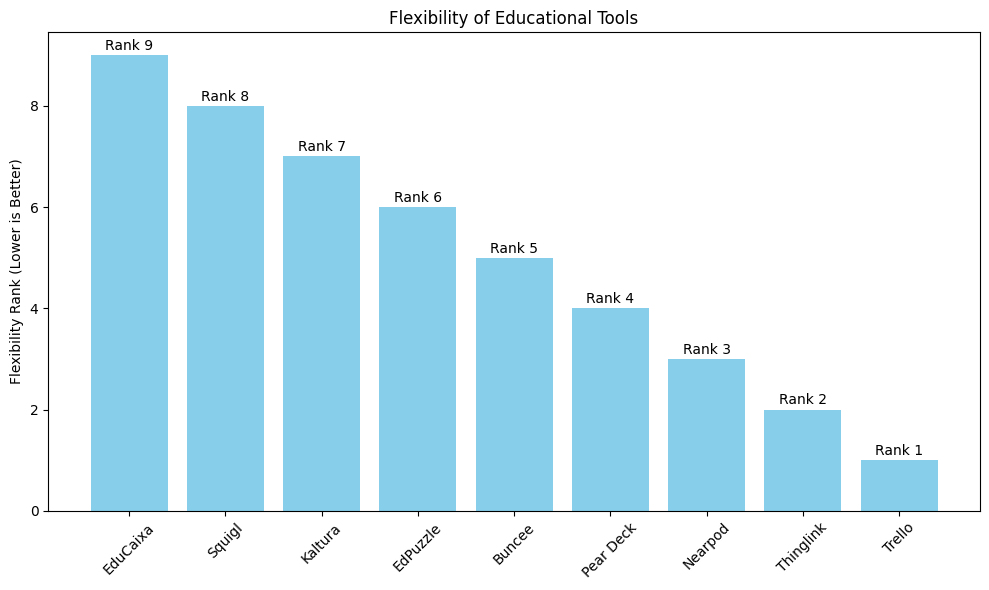

In [613]:
plt.figure(figsize=(10, 6))
bars = plt.bar(tools, flexibility_rank, color='skyblue')
plt.ylabel('Flexibility Rank (Lower is Better)')
plt.title('Flexibility of Educational Tools')

for bar, rank in zip(bars, flexibility_rank):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'Rank {rank}', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [614]:
# Define tools and their flexibility ranks (1 = most flexible)
tools = ['Trello', 'Thinglink', 'Nearpod', 'Pear Deck', 'Buncee',
         'EdPuzzle', 'Kaltura', 'Squigl', 'EduCaixa']
flexibility_rank = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create a DataFrame for flexibility
flex_df = pd.DataFrame({
    'Tool': tools,
    'Flexibility_Rank': flexibility_rank
})
flex_df


,Tool,Flexibility_Rank
0,Trello,1
1,Thinglink,2
2,Nearpod,3
3,Pear Deck,4
4,Buncee,5
5,EdPuzzle,6
6,Kaltura,7
7,Squigl,8
8,EduCaixa,9


In [615]:
avg_hits_per_tool = df_combined[df_combined['keyword'].isin(tools)].groupby('keyword')['hits'].mean().reset_index()
avg_hits_per_tool.columns = ['tool', 'average_hits']

In [616]:
df_flex = pd.DataFrame({'tool': tools, 'flexibility_rank': flexibility_rank})
df_combined = pd.merge(df_flex, avg_hits_per_tool, on='tool')

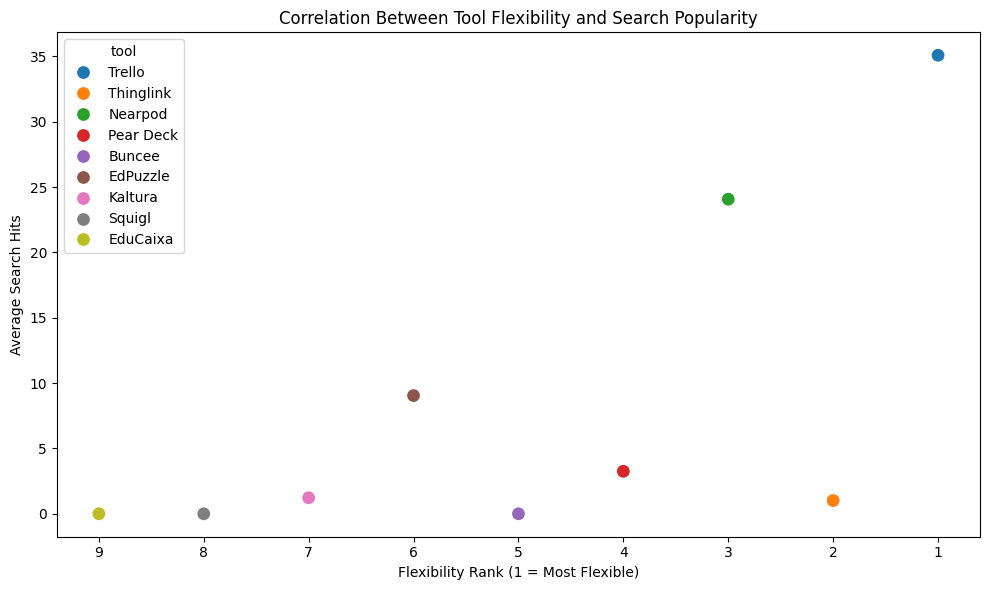

In [617]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='flexibility_rank', y='average_hits', hue='tool', s=100)

plt.title("Correlation Between Tool Flexibility and Search Popularity")
plt.xlabel("Flexibility Rank (1 = Most Flexible)")
plt.ylabel("Average Search Hits")
plt.gca().invert_xaxis()  
plt.tight_layout()
plt.show()

In [618]:
df_combined['flexibility_rank'] = df_combined['flexibility_rank'].max() - df_combined['flexibility_rank']
correlation = df_combined['flexibility_rank'].corr(df_combined['average_hits'])
print(f"Pearson Correlation between Flexibility and Search Popularity: {correlation:.2f}")


Pearson Correlation between Flexibility and Search Popularity: 0.66
